In [1]:
import pandas as pd
import geopandas as gpd
import xml.etree.ElementTree as ET
from datetime import datetime


In [2]:
gpx_file = r'..\..\..\..\data\strava\Rupit_Loop.gpx'
gdf = gpd.read_file(gpx_file)
gdf


,ele,time,magvar,geoidheight,name,cmt,desc,src,link1_href,link1_text,...,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid,geometry


In [3]:
ns = {'gpxns': 'http://www.topografix.com/GPX/1/1'}

In [4]:
tree = ET.parse(gpx_file)
root = tree.getroot()
for child in root:
    print(child)


<Element '{http://www.topografix.com/GPX/1/1}metadata' at 0x0000029B7B2B6C70>
<Element '{http://www.topografix.com/GPX/1/1}trk' at 0x0000029B7B2B6E00>


In [5]:
trk = root.find('gpxns:trk', ns)
for child in trk:
    print(child)


<Element '{http://www.topografix.com/GPX/1/1}name' at 0x0000029B7B2B6EA0>
<Element '{http://www.topografix.com/GPX/1/1}type' at 0x0000029B7B2B6F40>
<Element '{http://www.topografix.com/GPX/1/1}trkseg' at 0x0000029B7B2C4040>


In [6]:
trk = root.find('gpxns:trk', ns)
trkseg = trk.find('gpxns:trkseg', ns)
trkpts = []
FMT = '%Y-%m-%dT%H:%M:%SZ'
cols = ['DateTime', 'Longitude', 'Latitude', 'Elevation']
for trkpt in trkseg:
    x = float(trkpt.attrib['lon'])
    y = float(trkpt.attrib['lat'])
    elev = float(trkpt.find('gpxns:ele', ns).text) + 76
    trkpt_dt_text = trkpt.find('gpxns:time', ns).text
    trkpt_dt = datetime.strptime(trkpt_dt_text, FMT)
    trkpts.append((trkpt_dt, x, y, elev))
df = pd.DataFrame.from_records(trkpts, columns=cols)
df


,DateTime,Longitude,Latitude,Elevation
0,2018-04-30 06:15:50,2.823739,41.981655,76.6
1,2018-04-30 06:15:51,2.823758,41.981671,76.2
2,2018-04-30 06:15:52,2.823758,41.981671,75.4
3,2018-04-30 06:15:54,2.823823,41.981718,76.6
4,2018-04-30 06:15:58,2.823926,41.981820,76.4
...,...,...,...,...
10742,2018-04-30 16:24:01,2.823945,41.981973,93.0
10743,2018-04-30 16:24:04,2.823986,41.981853,92.8
10744,2018-04-30 16:24:05,2.823989,41.981831,92.8
10745,2018-04-30 16:24:11,2.823973,41.981696,93.0


In [17]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude, crs="EPSG:4326"))

<Axes: >

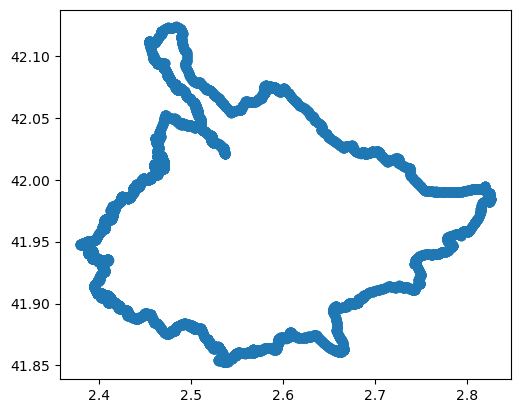

In [18]:
gdf.plot()

<Axes: >

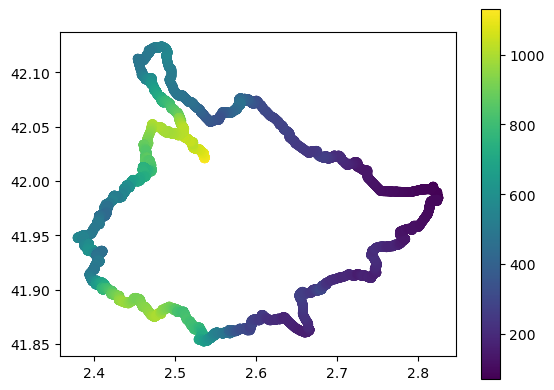

In [19]:
gdf.plot("Elevation", legend=True)